Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA



from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,StratifiedKFold, cross_val_predict



from sklearn.metrics import accuracy_score,classification_report,plot_roc_curve,roc_auc_score, precision_recall_curve, average_precision_score,PrecisionRecallDisplay

from scipy.stats import zscore
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE



In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

we want to predict whether the person Attrition=Yes or No. based on other features.
So this is a classification problem

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


1470 rows × 35 columns

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing data in any features

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### EDA

In [9]:
numericCols=[]
catCols=[]
for col in df.columns:
    if df[col].dtype in ['object']:
        catCols.append(col)
    else:
        numericCols.append(col)

In [10]:
numericCols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [11]:
catCols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [12]:
len(catCols)+len(numericCols)

35

In [13]:
for col in catCols:
    print(col, df[col].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']


over18 has only one value so we can drop it

In [14]:
df.drop('Over18',axis=1,inplace=True)

In [15]:
catCols.remove('Over18')

In [16]:
print(df['EmployeeCount'].unique())
print(df['StandardHours'].unique())

[1]
[80]


These features are having only one unique value so dropping these features(EmployeeCount,StandardHours)

In [17]:
df.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

In [18]:
catCols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [19]:
numericCols.remove('EmployeeCount')

In [20]:
numericCols.remove('StandardHours')

In [21]:
len(df['EmployeeNumber'].unique())

1470

So employeeNumber has unique value per employee so removing it

In [22]:
df.drop(['EmployeeNumber'],axis=1,inplace=True)

In [23]:
numericCols.remove('EmployeeNumber')

In [24]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Adding these cols in to categorical for better plotting

'Education','EnvironmentSatisfaction' , 'JobInvolvement','JobLevel','JobSatisfaction' , 'PerformanceRating' , 'RelationshipSatisfaction' , 'StockOptionLevel', 'WorkLifeBalance''YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear'

In [25]:
catCols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [52]:
catCols1=catCols.copy()

In [53]:
numericCols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [54]:
X=['Education','EnvironmentSatisfaction' , 'JobInvolvement','JobLevel','JobSatisfaction' , 'PerformanceRating' , 'RelationshipSatisfaction' , 'StockOptionLevel', 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']

In [55]:
for i in X:
    catCols1.append(i)

    

In [34]:
len(catCols)+len(numericCols)

31

In [56]:
catCols1

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'TrainingTimesLastYear']

In [57]:
dfs = df.groupby(['Attrition', 'Gender']).size()
dfs

Attrition  Gender
No         Female    501
           Male      732
Yes        Female     87
           Male      150
dtype: int64

In [58]:
dfs = df.groupby(['Attrition', 'Gender']).size().reset_index()
dfs

,Attrition,Gender,0
0,No,Female,501
1,No,Male,732
2,Yes,Female,87
3,Yes,Male,150


In [59]:
df_plot_Gen = df.groupby(['Attrition', 'Gender']).size().reset_index().pivot(columns = 'Attrition', index = 'Gender', values = 0)
df_plot_Gen

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


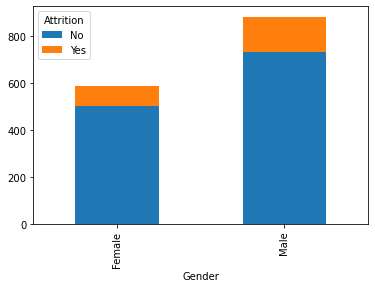

In [60]:
df_plot_Gen.plot(kind = 'bar', stacked = True)
plt.show()

In [61]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [62]:
k=[]
for x in catCols1[1:]:
    k.append(df.groupby(['Attrition', x]).size().reset_index().pivot(columns = 'Attrition', index =x, values = 0))

In [63]:
for i in k:
    print(i)
    print('='*50)

Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156
Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92
Attrition          No  Yes
EducationField            
Human Resources    20    7
Life Sciences     517   89
Marketing         124   35
Medical           401   63
Other              71   11
Technical Degree  100   32
Attrition   No  Yes
Gender             
Female     501   87
Male       732  150
Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33
Att

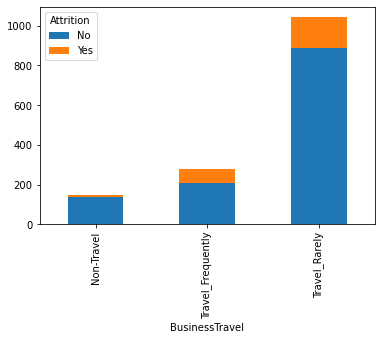

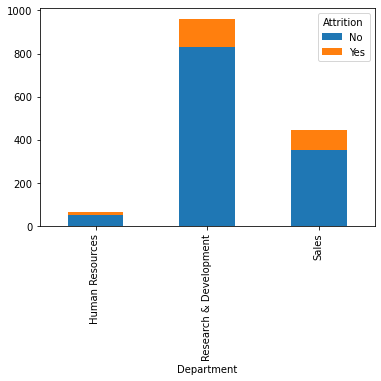

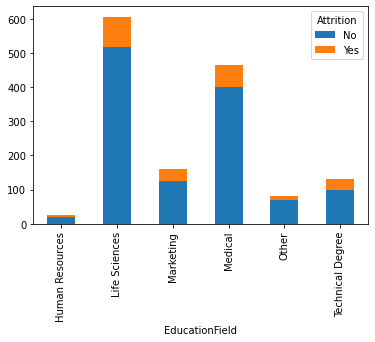

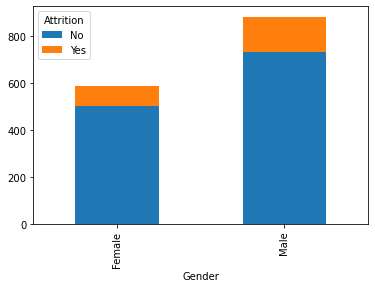

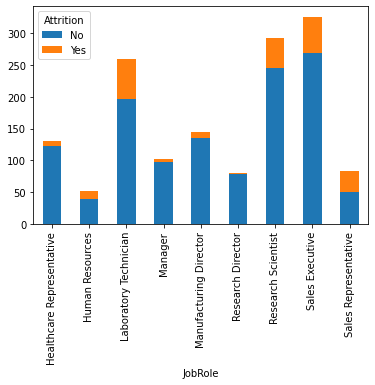

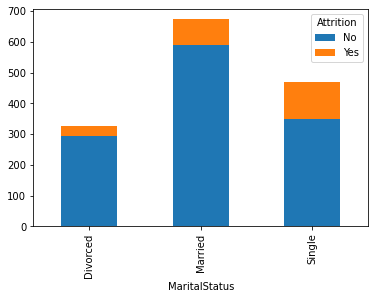

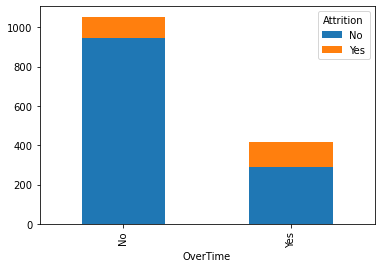

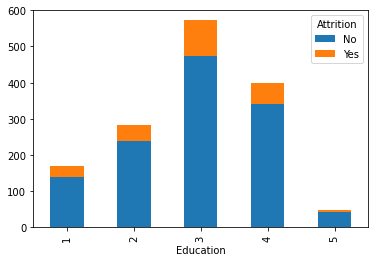

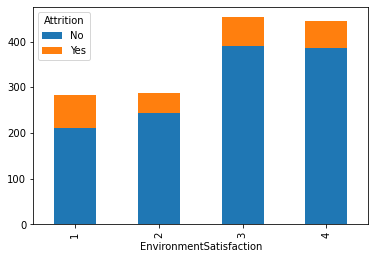

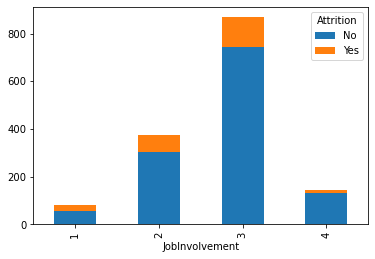

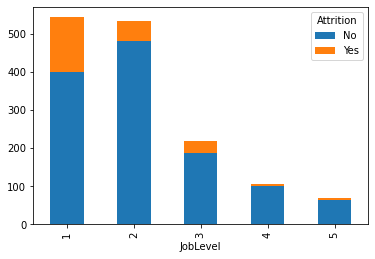

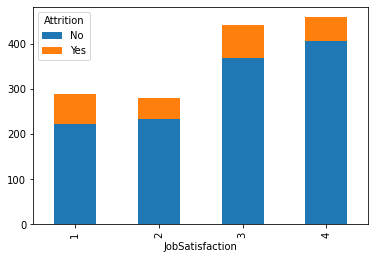

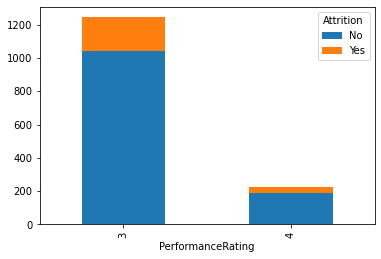

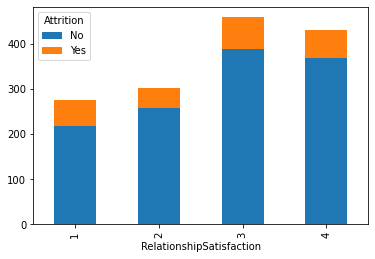

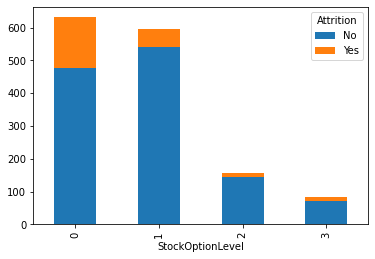

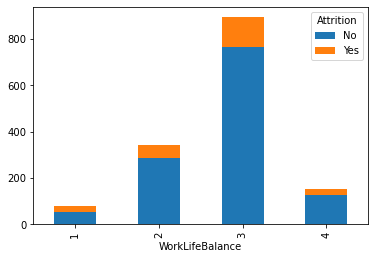

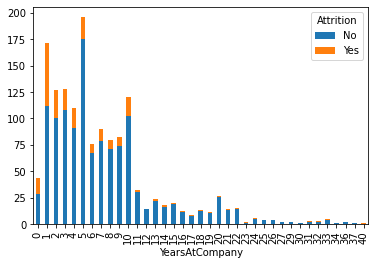

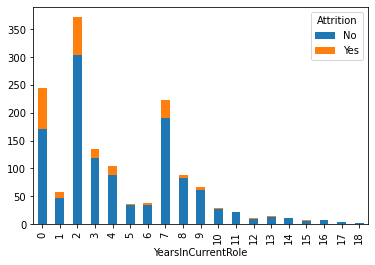

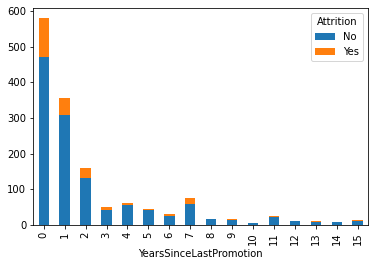

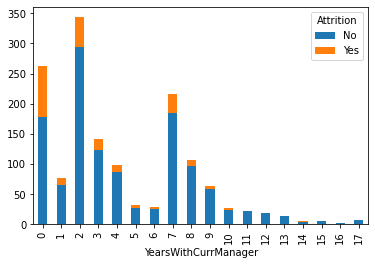

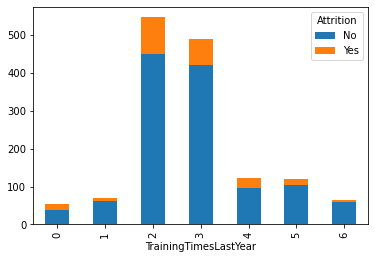

In [64]:
for j in k:
    j.plot(kind = 'bar', stacked = True)

    

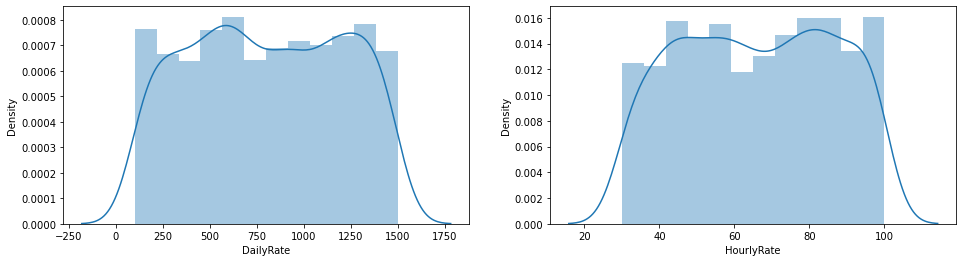

In [65]:
fig, ax = plt.subplots(1,2, figsize = (16,4))
sns.distplot(df['DailyRate'], ax = ax[0])
sns.distplot(df['HourlyRate'], ax = ax[1])
plt.show()

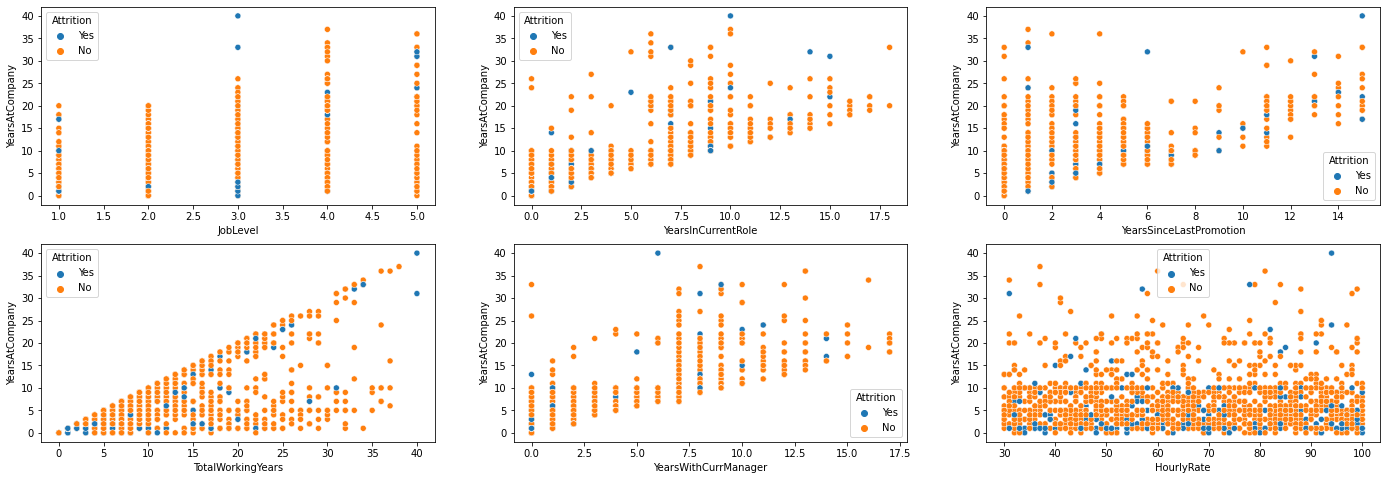

In [68]:
fig, ax = plt.subplots(2, 3, figsize = (24, 8))
sns.scatterplot(data = df, x = "JobLevel", y = "YearsAtCompany", hue="Attrition", ax = ax[0,0])
sns.scatterplot(data = df, x = "YearsInCurrentRole", y = "YearsAtCompany", hue="Attrition",  ax = ax[0,1])
sns.scatterplot(data = df, x = "YearsSinceLastPromotion", y = "YearsAtCompany", hue="Attrition",  ax = ax[0,2])
sns.scatterplot(data = df, x = "TotalWorkingYears", y = "YearsAtCompany", hue="Attrition",  ax = ax[1,0])
sns.scatterplot(data = df, x = "YearsWithCurrManager", y = "YearsAtCompany", hue="Attrition",  ax = ax[1,1])
sns.scatterplot(data = df, x = "HourlyRate", y = "YearsAtCompany", hue="Attrition", ax = ax[1,2])
plt.show()

### checking for outliers

In [69]:
catCols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [70]:

zScores=np.abs(zscore(df.drop(catCols,axis=1)))
zScores

array([[0.4463504 , 0.74252653, 1.01090934, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 1.2977746 , 0.14714972, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 1.41436324, 0.88751511, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 1.60518328, 0.64072665, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.54667746, 0.88751511, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.43256792, 0.14714972, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [71]:
filteredEntries=(zScores<3).all(axis=1)
filteredEntries

array([ True,  True,  True, ...,  True,  True,  True])

In [72]:
np.sum(filteredEntries)

1387

In [74]:
((1470 -1387)/1470)*100

5.646258503401361

only 5.64% of data are outliers So removing them.

In [75]:
df[filteredEntries]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [78]:
catCols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [81]:
df['Department']

0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object

In [114]:
df1=df.copy()

In [115]:
catCols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [122]:
df=pd.get_dummies(df,columns=catCols[1:],drop_first=True)

In [124]:
df1=pd.get_dummies(df1,catCols,drop_first=True)

In [133]:
df1.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole

In [125]:
numericCols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [134]:
numericCols+['Attrition_Yes']

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition_Yes']

In [137]:
X=df1[numericCols+['Attrition_Yes']].corr()
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


<AxesSubplot:>

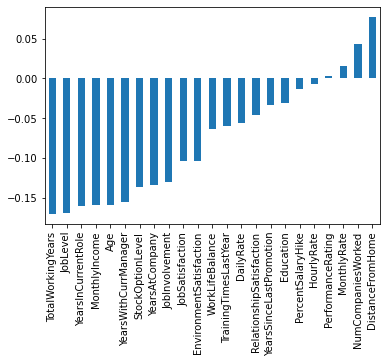

In [138]:
X['Attrition_Yes'][:-1].sort_values().plot(kind='bar')

splitting into X and y features

In [141]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [144]:
X.shape

(1470, 44)

In [147]:
explained_variance = []

for n in range(1,45):
    pca = PCA(n_components=n)
    pca.fit(X)
    
    explained_variance.append((np.sum(pca.explained_variance_ratio_)*100))

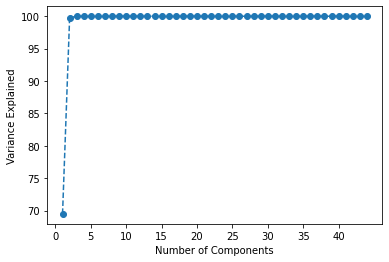

In [148]:
plt.plot(range(1,45),explained_variance,'o--')
plt.xticks(list(range(0,45,5)))
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

In [158]:
explained_variance[4]

99.99977080505627

5 components can explain 99.99% of variance

In [233]:
pca1=PCA(n_components=5)
x_pca=pca1.fit_transform(X)

# Applying different machine learning models now

## identifying the best random state

In [165]:
max_accu=0
maxRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    accurac=accuracy_score(y_test,pred)
    #print(accurac*100,"at random state",i)
    if(accurac>max_accu):
        max_accu=accurac
        maxRS=i
        
print("best accuracy is",max_accu,"on random state",maxRS)

best accuracy is 0.8004115226337448 on random state 5


best accuracy is 0.8004115226337448 on random state 5

In [234]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=5)

oversampling happens only for the triaing set, after the split of data into training and validation set

In [235]:
smt=SMOTE()
X_resample,y_resample=smt.fit_resample(X_train,y_train)

In [236]:
y_resample.value_counts()

No     832
Yes    832
Name: Attrition, dtype: int64

In [237]:
DTC=DecisionTreeClassifier()
DTC.fit(X_resample,y_resample)
pred=DTC.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

          No       0.85      0.73      0.79       401
         Yes       0.24      0.41      0.31        85

    accuracy                           0.67       486
   macro avg       0.55      0.57      0.55       486
weighted avg       0.75      0.67      0.70       486



In [238]:
logR=LogisticRegression()
logR.fit(X_resample,y_resample)

pred=logR.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.88      0.46      0.60       401
         Yes       0.22      0.71      0.33        85

    accuracy                           0.50       486
   macro avg       0.55      0.58      0.47       486
weighted avg       0.76      0.50      0.55       486



In [239]:
RFC=RandomForestClassifier()
RFC.fit(X_resample,y_resample)

pred=RFC.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.85      0.82      0.84       401
         Yes       0.29      0.34      0.31        85

    accuracy                           0.74       486
   macro avg       0.57      0.58      0.58       486
weighted avg       0.76      0.74      0.75       486



In [240]:
svc=SVC()

svc.fit(X_resample,y_resample)

pred=svc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.89      0.51      0.65       401
         Yes       0.24      0.71      0.35        85

    accuracy                           0.55       486
   macro avg       0.56      0.61      0.50       486
weighted avg       0.78      0.55      0.60       486



In [241]:
ada=AdaBoostClassifier()
ada.fit(X_resample,y_resample)

pred=ada.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.86      0.66      0.75       401
         Yes       0.23      0.48      0.31        85

    accuracy                           0.63       486
   macro avg       0.55      0.57      0.53       486
weighted avg       0.75      0.63      0.67       486



In [242]:
dtcAC=0.67
logrAc=0.50
rfcAC=0.74
svcAC=0.55
adaAC=0.63

RFC has more accuracy 0.74 so using it in hyperparameter tuning

## HyperParameterTuning

In [243]:
from sklearn.model_selection import GridSearchCV

In [244]:
param_grid = {'pca__n_components':[3,4,5,6],
              'RC__criterion':['gini','entropy'],
              'RC__min_samples_split':[2,3,4],
             'RC__max_features':['sqrt','log2']
            }

In [245]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)

In [246]:
rfc=RandomForestClassifier()

In [247]:
from sklearn.pipeline import Pipeline


In [248]:

operations = [('pca',pca),('RC',rfc)]
#operations = [('pca',pca),('rfc',rfc)]


pipe=Pipeline(operations)

In [251]:
grid = GridSearchCV(pipe, param_grid, cv = cv,scoring='accuracy',verbose=2)


In [252]:
grid.fit(X,y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END RC__criterion=gini, RC__max_features=sqrt, RC__min_samples_split=2, pca__n_components=3; total time=   0.2s
[CV] END RC__criterion=gini, RC__max_features=sqrt, RC__min_samples_split=2, pca__n_components=3; total time=   0.1s
[CV] END RC__criterion=gini, RC__max_features=sqrt, RC__min_samples_split=2, pca__n_components=3; total time=   0.1s
[CV] END RC__criterion=gini, RC__max_features=sqrt, RC__min_samples_split=2, pca__n_components=3; total time=   0.1s
[CV] END RC__criterion=gini, RC__max_features=sqrt, RC__min_samples_split=2, pca__n_components=3; total time=   0.1s
[CV] END RC__criterion=gini, RC__max_features=sqrt, RC__min_samples_split=2, pca__n_components=4; total time=   0.2s
[CV] END RC__criterion=gini, RC__max_features=sqrt, RC__min_samples_split=2, pca__n_components=4; total time=   0.3s
[CV] END RC__criterion=gini, RC__max_features=sqrt, RC__min_samples_split=2, pca__n_components=4; total time=   0.2s
[C

[CV] END RC__criterion=gini, RC__max_features=log2, RC__min_samples_split=2, pca__n_components=5; total time=   0.2s
[CV] END RC__criterion=gini, RC__max_features=log2, RC__min_samples_split=2, pca__n_components=5; total time=   0.2s
[CV] END RC__criterion=gini, RC__max_features=log2, RC__min_samples_split=2, pca__n_components=5; total time=   0.2s
[CV] END RC__criterion=gini, RC__max_features=log2, RC__min_samples_split=2, pca__n_components=5; total time=   0.2s
[CV] END RC__criterion=gini, RC__max_features=log2, RC__min_samples_split=2, pca__n_components=5; total time=   0.2s
[CV] END RC__criterion=gini, RC__max_features=log2, RC__min_samples_split=2, pca__n_components=6; total time=   0.2s
[CV] END RC__criterion=gini, RC__max_features=log2, RC__min_samples_split=2, pca__n_components=6; total time=   0.2s
[CV] END RC__criterion=gini, RC__max_features=log2, RC__min_samples_split=2, pca__n_components=6; total time=   0.2s
[CV] END RC__criterion=gini, RC__max_features=log2, RC__min_samp

[CV] END RC__criterion=entropy, RC__max_features=sqrt, RC__min_samples_split=3, pca__n_components=3; total time=   0.2s
[CV] END RC__criterion=entropy, RC__max_features=sqrt, RC__min_samples_split=3, pca__n_components=3; total time=   0.2s
[CV] END RC__criterion=entropy, RC__max_features=sqrt, RC__min_samples_split=3, pca__n_components=3; total time=   0.2s
[CV] END RC__criterion=entropy, RC__max_features=sqrt, RC__min_samples_split=3, pca__n_components=3; total time=   0.2s
[CV] END RC__criterion=entropy, RC__max_features=sqrt, RC__min_samples_split=3, pca__n_components=3; total time=   0.2s
[CV] END RC__criterion=entropy, RC__max_features=sqrt, RC__min_samples_split=3, pca__n_components=4; total time=   0.3s
[CV] END RC__criterion=entropy, RC__max_features=sqrt, RC__min_samples_split=3, pca__n_components=4; total time=   0.3s
[CV] END RC__criterion=entropy, RC__max_features=sqrt, RC__min_samples_split=3, pca__n_components=4; total time=   0.3s
[CV] END RC__criterion=entropy, RC__max_

[CV] END RC__criterion=entropy, RC__max_features=log2, RC__min_samples_split=3, pca__n_components=4; total time=   0.3s
[CV] END RC__criterion=entropy, RC__max_features=log2, RC__min_samples_split=3, pca__n_components=5; total time=   0.3s
[CV] END RC__criterion=entropy, RC__max_features=log2, RC__min_samples_split=3, pca__n_components=5; total time=   0.3s
[CV] END RC__criterion=entropy, RC__max_features=log2, RC__min_samples_split=3, pca__n_components=5; total time=   0.3s
[CV] END RC__criterion=entropy, RC__max_features=log2, RC__min_samples_split=3, pca__n_components=5; total time=   0.3s
[CV] END RC__criterion=entropy, RC__max_features=log2, RC__min_samples_split=3, pca__n_components=5; total time=   0.3s
[CV] END RC__criterion=entropy, RC__max_features=log2, RC__min_samples_split=3, pca__n_components=6; total time=   0.3s
[CV] END RC__criterion=entropy, RC__max_features=log2, RC__min_samples_split=3, pca__n_components=6; total time=   0.3s
[CV] END RC__criterion=entropy, RC__max_

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(n_components=6)),
                                       ('RC', RandomForestClassifier())]),
             param_grid={'RC__criterion': ['gini', 'entropy'],
                         'RC__max_features': ['sqrt', 'log2'],
                         'RC__min_samples_split': [2, 3, 4],
                         'pca__n_components': [3, 4, 5, 6]},
             scoring='accuracy', verbose=2)

In [253]:
grid.best_score_

0.8476190476190476

In [254]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RC__criterion,param_RC__max_features,param_RC__min_samples_split,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.229581,0.044495,0.018409,0.005314,gini,sqrt,2,3,"{'RC__criterion': 'gini', 'RC__max_features': ...",0.836735,0.809524,0.826531,0.843537,0.840136,0.831293,0.012283,33
1,0.291778,0.067159,0.015857,0.001098,gini,sqrt,2,4,"{'RC__criterion': 'gini', 'RC__max_features': ...",0.819728,0.809524,0.829932,0.846939,0.833333,0.827891,0.012654,47
2,0.265571,0.011940,0.010867,0.004899,gini,sqrt,2,5,"{'RC__criterion': 'gini', 'RC__max_features': ...",0.826531,0.816327,0.846939,0.843537,0.850340,0.836735,0.013085,13
3,0.273500,0.021759,0.015602,0.000017,gini,sqrt,2,6,"{'RC__criterion': 'gini', 'RC__max_features': ...",0.836735,0.829932,0.843537,0.846939,0.846939,0.840816,0.006595,8
4,0.206102,0.023195,0.018529,0.006019,gini,sqrt,3,3,"{'RC__criterion': 'gini', 'RC__max_features': ...",0.840136,0.809524,0.846939,0.840136,0.836735,0.834694,0.013014,22
5,0.284056,0.029527,0.012548,0.005298,gini,sqrt,3,4,"{'RC__criterion': 'gini', 'RC__max_features': ...",0.826531,0.816327,0.826531,0.843537,0.829932,0.828571,0.008765,46
6,0.316773,0.025284,0.015593,0.000016,gini,sqrt,3,5,"{'RC__criterion': 'gini', 'RC__max_features': ...",0.829932,0.812925,0.829932,0.843537,0.843537,0.831973,0.011302,31
7,0.307726,0.007421,0.015607,0.000017,gini,sqrt,3,6,"{'RC__criterion': 'gini', 'RC__max_features': ...",0.836735,0.826531,0.846939,0.850340,0.846939,0.841497,0.008765,6
8,0.246501,0.024561,0.015976,0.002294,gini,sqrt,4,3,"{'RC__criterion': 'gini', 'RC__max_features': ...",0.836735,0.816327,0.836735,0.843537,0.843537,0.835374,0.009998,19
9,0.297543,0.020307,0.015590,0.000016,gini,sqrt,4,4,"{'RC__criterion': 'gini', 'RC__max_features': ...",0.829932,0.802721,0.836735,0.843537,0.836735,0.829932,0.014270,39


In [255]:
grid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=6)),
                ('RC', RandomForestClassifier(max_features='log2'))])

In [256]:
grid.best_params_

{'RC__criterion': 'gini',
 'RC__max_features': 'log2',
 'RC__min_samples_split': 2,
 'pca__n_components': 6}

## Training with best params

In [257]:
rfc=RandomForestClassifier(criterion='gini',max_features='log2',min_samples_split= 2)

In [258]:
pca=PCA(n_components=6)

In [259]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)


In [261]:
smt=SMOTE()
X_resample,y_resample=smt.fit_resample(X_train,y_train)

x_pca_train=pca.fit_transform(X_resample)

x_pca_test=pca.transform(X_test)

In [262]:
operations = [('pca',pca),('rfc',rfc)]

In [263]:
pipe=Pipeline(operations)

In [264]:
pipe.fit(X_resample,y_resample)

Pipeline(steps=[('pca', PCA(n_components=6)),
                ('rfc', RandomForestClassifier(max_features='log2'))])

In [265]:
pred=pipe.predict(X_test)


In [269]:
confusion_matrix(y_test,pred)


array([[326,  75],
       [ 59,  26]], dtype=int64)

In [270]:

print(classification_report(y_test,pred))


              precision    recall  f1-score   support

          No       0.85      0.81      0.83       401
         Yes       0.26      0.31      0.28        85

    accuracy                           0.72       486
   macro avg       0.55      0.56      0.55       486
weighted avg       0.74      0.72      0.73       486



In [271]:
accuracyScore=accuracy_score(y_test,pred)
print(accuracyScore)

0.7242798353909465


final accuracy achieved is 72% with Random Forest Classifier

## plotting AUC ROC CURVE

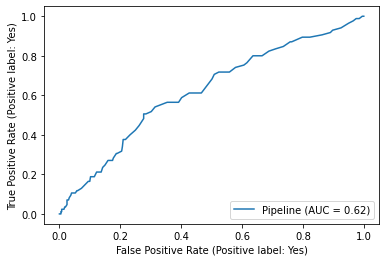

In [272]:
plot_roc_curve(pipe,X_test,y_test)

AUC-ROC Curve area has 0.62

## saving the model


In [273]:
import joblib
joblib.dump(pipe,"IBM_HR_Attrition.pkl")

['IBM_HR_Attrition.pkl']